<html><font size=6><B>3η εργαστηριακή άσκηση</B><BR>
    <BR><B>Link prediction - Πρόβλεψη συνδέσμων</B></BR>
    </font></html>

<html><font size=4><B>1. Κατασκευή γράφου και προεργασία για την πρόβλεψη συνδέσμων</B></font>
    <li><B>1(i).</B> Χρησιμοποιήστε το dataset <a href="http://konect.cc/networks/dbpedia-similar/"> Similarities (DBpedia)</a>, για να κατασκευάσετε τον μη κατευθυνόμενο (undirected) γράφο $G$ <a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]</a>,<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]</a>. Οι κόμβοι του γράφου αναπαριστούν σελίδες της Wikipedia και οι ακμές σχέση ομοιότητας μεταξύ τους. Στην σελίδα <a href="http://konect.cc/networks/dbpedia-similar/"> KONECT (DBpedia)</a> μπορείτε να βρείτε πληροφορίες για τις ιδιότητες του γράφου.</a><BR>
        <B><U>Υπόδειξη:</U></B> Μπορείτε να ελέγξετε προγραμματιστικά αν το dataset περιέχει διπλότυπα των ακμών με την ίδια ή αντίστροφη σειρά (π.χ. ακμές (a,b) και (b,a)), και να λάβετε υπ' όψιν σας αυτήν σας την παρατήρηση, όπου τυχόν χρειαστεί, στην ερώτηση 2.<BR></html>

In [140]:

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

edges = set()
duplicates = set()

# Open the file for reading
with open('./dbpedia-similar/out.dbpedia-similar', 'r') as f:
    # Iterate over the lines in the file
    for line in f:
        # Split the line into two parts
        parts = line.split()
        # Convert the parts to integers
        from_node = int(parts[0])
        to_node = int(parts[1])
        # Add the edge to the set, with the nodes sorted in ascending order
        edge = tuple(sorted((from_node, to_node)))
        if edge in edges:
            duplicates.add(edge)
        else:
            edges.add(edge)

if len(duplicates) == 0:
    print("No duplicate edges found")
else:
    # Print the duplicate edges
    print("Duplicate edges:", duplicates)


# Create a graph from the edges
G = nx.read_edgelist('./dbpedia-similar/out.dbpedia-similar', create_using=nx.Graph())
print(G)
 



No duplicate edges found
Graph with 430 nodes and 565 edges


 <li><B>1(ii).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G$.</li><BR>

In [141]:
initial_node_count= len(G.nodes())
print("Number of nodes in the graph: ", initial_node_count)

initial_edge_count= len(G.edges())
print("Number of edges in the graph: ", initial_edge_count)

initial_degree_avg = sum(nx.degree_centrality(G).values()) / initial_node_count
print("Average degree of nodes in the graph: ", initial_degree_avg)

initial_number_of_connected_components = nx.number_connected_components(G)
print("Number of connected components in the graph: ", initial_number_of_connected_components)


Number of nodes in the graph:  430
Number of edges in the graph:  565
Average degree of nodes in the graph:  0.0061256572884480125
Number of connected components in the graph:  95


<li><B>1(iii). </B>Υπολογίστε το σύνολο των ασύνδετων ζευγών κόμβων (unconnected pairs) στον γράφο χρησιμοποιώντας τον πίνακα γειτνίασης (adjacency matrix). Δώστε επίσης τον αριθμό τους. Λάβετε υπ' όψιν σας ότι ο γράφος είναι μη κατευθυνόμενος και δεν χρειάζεται να διατρέξετε ολόκληρο τον πίνακα γειτνίασης.</li><BR>

In [142]:

def find_unconnected(G):
    # Get the adjacency matrix of the graph
    adj_matrix = nx.adjacency_matrix(G)
    # Convert the matrix to a dense NumPy array
    adj_array = adj_matrix.toarray()
    # Create an empty list to store the unconnected pairs
    unconnected = []
    # Iterate over the rows and columns of the array
    for i in range(adj_array.shape[0]):
        for j in range(adj_array.shape[1]):
            # If the element is 0 and the row index is less than the column index, add the corresponding pair of nodes to the list
            if adj_array[i, j] == 0 and i < j:
                unconnected.append((str(i+1), str(j+1)))
    # Return the list of unconnected pairs
    return unconnected

unconnected_pairs = find_unconnected(G)

print("Number of unconnected pairs: ", len(find_unconnected(G)))



Number of unconnected pairs:  91671


<li><B>1(iv).</B> Υπολογίστε το σύνολο των ακμών (removable edges) που μπορούν να αφαιρεθούν από τον γράφο χωρίς να υπάρχει κατάτμηση (splitting) του γράφου (δηλ. ο αριθμός των συνεκτικών συνιστωσών θα πρέπει να παραμένει αμετάβλητος). Υπόδειξη: Ελέγχετε επίσης ότι με αφαίρεση ακμής δεν μειώνεται ο αριθμός των κόμβων (εφόσον δεν υπάρχει ξεχωριστό αρχείο μόνο με κόμβους στο dataset). Δώστε επίσης τον αριθμό των ακμών (removable edges) που μπορούν να αφαιρεθούν υπό αυτές τις προϋποθέσεις.</li><BR>

In [143]:
removable_edges = list()
copy_of_G = G.copy()
for edge in G.edges():
    # remove the edge from the copy of the graph
    copy_of_G.remove_edge(*edge)
    # check if the number_connected_components remains the same and the number of nodes is the same. Also we removed the self-loops
    if (nx.number_connected_components(copy_of_G) == initial_number_of_connected_components and len(copy_of_G.nodes()) == initial_node_count) and edge[0] != edge[1]:
        # add the edge to the set of removable edges
        removable_edges.append(edge)
    else:
        # add the edge back to the graph
        copy_of_G.add_edge(*edge)

print("Number of removable edges in the graph: ", len(removable_edges))

Number of removable edges in the graph:  229


<li><B>1(vα).</B> Κατασκευάστε dataframe που συνενώνει τις απαντήσεις των ερωτημάτων 1(iii) και 1(iv) (unconnected+removables). Χρησιμοποιήστε την μεταβλητή $link$ που θα παίρνει τιμή 1 ή 0 ανάλογα με την ύπαρξη συνδέσμου ή μη. To dataframe αυτό συγκεντρώνει τα θετικά και αρνητικά δείγματα για την πρόβλεψη των μελλοντικών συνδέσεων (link: target variable). <BR>
    <li><B>1(vβ).</B> Κατασκευάστε τον γράφο $G'$ που προκύπτει από την αφαίρεση από τον γράφο $G$ των ακμών του ερωτήματος 1(iv). <BR>
    <li><B>1(vγ).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G'$.</li><BR>

In [160]:
# create a dataframe with removable edges
df_removable_edges = pd.DataFrame(removable_edges, columns=['node1', 'node2'])
df_removable_edges['link'] = 1

# create a dataframe with unconnected pairs
df_unconnected = pd.DataFrame(unconnected_pairs, columns=['node1', 'node2'])
df_unconnected['link'] = 0

#merge in one dataframe
df_removable_unconnected = pd.concat([df_removable_edges, df_unconnected], ignore_index=True)

print(df_removable_unconnected)

#build graph G'= G - removable_edges
G_new = G.copy()
G_new.remove_edges_from(removable_edges)

G_new_node_count= len(G_new.nodes())
print("Number of nodes in the new graph: ", G_new_node_count)

G_new_edge_count= len(G_new.edges())
print("Number of edges in the new graph: ", G_new_edge_count)

G_new_degree_avg = sum(nx.degree_centrality(G_new).values()) / G_new_node_count
print("Average degree of nodes in the new graph: ", G_new_degree_avg)

G_new_number_of_connected_components = nx.number_connected_components(G_new)
print("Number of connected components in the new graph: ", G_new_number_of_connected_components)



      node1 node2  link
0         1     2     1
1         1     3     1
2         1     4     1
3         3     4     1
4         3     5     1
...     ...   ...   ...
91895   426   430     0
91896   427   428     0
91897   427   429     0
91898   427   430     0
91899   429   430     0

[91900 rows x 3 columns]
Number of nodes in the new graph:  430
Number of edges in the new graph:  336
Average degree of nodes in the new graph:  0.0036428687591478492
Number of connected components in the new graph:  95


<html><font size=4><B>2. Εισαγωγή σε similarity-based μετρικές για Link prediction</B></font><BR><BR>
     <li> Η μετρική <B>Jaccard Coefficient (JC)</B> των κόμβων ${u}$ και ${v}$ ορίζεται ως $\frac{|\Gamma(u) \cap \Gamma(v)|}{|\Gamma(u) \cup \Gamma(v)|}$, όπου ${\Gamma(u)}$ είναι το σύνολο των γειτονικών κόμβων του κόμβου ${u}$.  <B></B>
        <li> Η μετρική <B>Preferential Αttachment (PA)</B> των κόμβων $u$ και $v$ ορίζεται ως $|\Gamma(u)| |\Gamma(v)|$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.</li>
        <li> Η μετρική <B>Resource Allocation (RA)</B> των κόμβων $u$ και $v$ ορίζεται ως $\sum_{w \in \Gamma(u) \cap \Gamma(v)} \frac{1}{|\Gamma(w)|}$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.</li><BR><BR>
    <li><B>2(i).</B> Για τον γράφο $G'$, που κατασκευάσατε στο ερώτημα 1(vβ), υπολογίστε την μετρική <B>Jaccard Coefficient (JC)</B>.  <u><a href="https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html?highlight=link%20prediction">Χρησιμοποιήστε την υλοποιημένη συνάρτηση του λογισμικού NetworkX.<a></u> <BR><BR>
    <li><B>2(ii). </B>Δώστε τις $k$ ακμές με την υψηλότερη τιμή μετρικής $JC$, όπου $k$ ο $Α.Μ.$ σας $mod$ $10$. Για $Α.Μ.$ λήγοντα σε $0$ δώστε τις $10$ ακμές με την υψηλότερη τιμή μετρικής.
        (Για την σύγκριση μεταξύ διαφορετικών μετρικών προτιμάται η εύρεση των $k$ επικρατέστερων συνδέσμων, αφού οι μετρικές επιστρέφουν διαφορετικό εύρος τιμών.)</li><BR>
    <li><B>2(iii). </B>Προσδιορίστε για την μέτρηση της απόδοσης της μετρικής $JC$ τα μεγέθη $Precision$, $Recall$ και $Accuracy$ και αναπαραστήστε τα γραφικά για τιμές κατωφλίου: $0.1$, $0.15$, $0.25$, $0.5$, $1.0$.  <BR><BR>
    $Precision=\frac{TP}{TP+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα <BR>
    $Recall=\frac{TP}{TP+FN}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα</li> 
    $Accuracy=\frac{TP+TN}{TP+FN+TN+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $TN$: αληθώς αρνητικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα</li><BR><BR>
        <B><U>Υπόδειξη:</U></B>
        Θετικό θεωρήστε ένα αποτέλεσμα, αν η μετρική $JC$ υπερβαίνει μια τιμή κατωφλίου (>=). Αρνητικό θεωρήστε το στην αντίθετη περίπτωση.
        <li>Αληθώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά (η τιμή της $JC$ υπερβαίνει την τιμή κατωφλίου) και πράγματι θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iv)).</li>
        <li>Αληθώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά και πράγματι δεν θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iii)).</li>
        <li>Ψευδώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά, ενώ δεν θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Ψευδώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά, ενώ θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Το άθροισμα $TN+FP$ πρέπει κάθε φορά να σας δίνει όλες τις ασύνδετες ακμές του γράφου $G$.</li>   
<li>Από το ερώτημα 1(iii) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες δεν θα υπάρξουν συνδέσεις.</li> <li>Από το ερώτημα 1(iv) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες θα υπάρξουν συνδέσεις.</li><BR></html>

top_k_edges are: [('162', '161', 1.0)]
Precision:  0.3991228070175439 Recall:  0.6594202898550725 Accuracy:  0.9962095461755557
Precision:  0.39732142857142855 Recall:  0.644927536231884 Accuracy:  0.9962095461755557
Precision:  0.4251207729468599 Recall:  0.6376811594202898 Accuracy:  0.996518550563418
Precision:  0.506578947368421 Recall:  0.5579710144927537 Accuracy:  0.997198360216715
Precision:  0.5655737704918032 Recall:  0.5 Accuracy:  0.9974867643120532


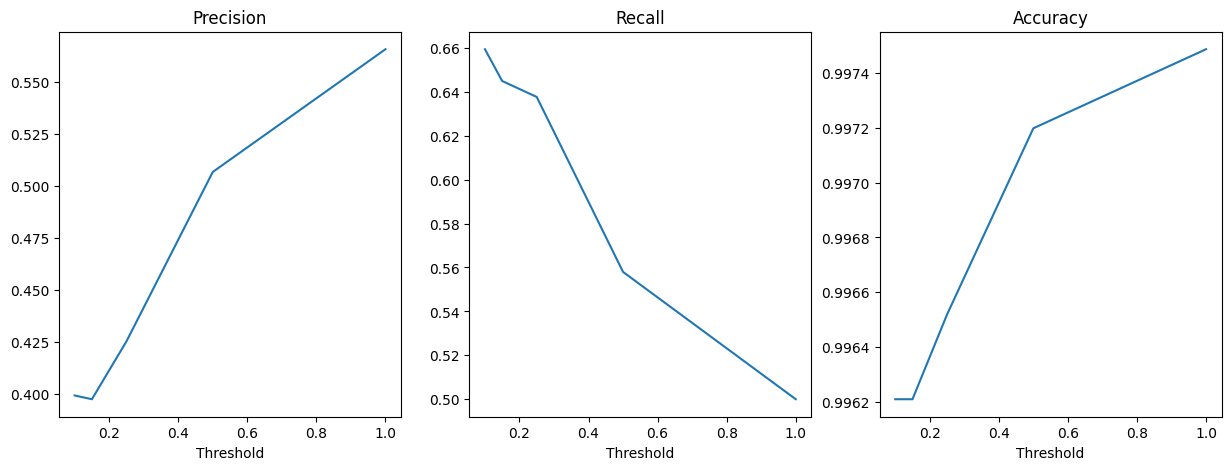

In [145]:
# 2(i).
# define a function that returns the Jaccard coefficient of a graph
def JCfunction(graph): 
    return nx.jaccard_coefficient(graph)

# 2(ii).
# ΑΜ = 18441
k = 18441%10
# sort the edges by the Jaccard coefficient
sorted_edges = sorted(JCfunction(G_new), key=lambda x: x[2], reverse=True)
# get the top k edges
top_k_edges = sorted_edges[:k]
# print the top k edges
print("top_k_edges are:",top_k_edges)

# 2(iii).
threshold_values = [0.1,0.15,0.25,0.5,1]

set_removable_edges = set(removable_edges)
set_unconnected_pairs = set(unconnected_pairs)

# function that returns the precision, recall and accuracy metrics for Jaccard coefficient
def metrics_JC(threshold):
    # define the true positives, false positives, false negatives and true negatives
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    # iterate over the top k edges
    for edge in sorted_edges:
        # if the edge is in the removable edges and the Jaccard coefficient is greater than the threshold, then it is a true positive
        if (edge[0], edge[1]) in set_removable_edges and edge[2] >= threshold:
            TP += 1
        # if the edge is in the set_unconnected_pairs and the Jaccard coefficient is greater than the threshold, then it is a false positive
        elif (edge[0], edge[1]) in set_unconnected_pairs and edge[2] >= threshold:
            FP += 1
        # if the edge is in the removable edges and the Jaccard coefficient is less than the threshold, then it is a false negative
        elif (edge[0], edge[1]) in set_removable_edges and edge[2] <= threshold:
            FN += 1
        # if the edge is in the set_unconnected_pairs and the Jaccard coefficient is less than the threshold, then it is a true negative
        elif (edge[0], edge[1]) in set_unconnected_pairs and edge[2] <= threshold:
            TN += 1
    

    # calculate the precision, recall and accuracy and ensure that the denominator is not 0
    if (TP + FP) != 0:
        precision = TP/(TP + FP)
    else:
        precision = 0
    if (TP + FN) != 0:
        recall = TP/(TP + FN)
    else:
        recall = 0
    if (TP + TN + FP + FN) != 0:
        accuracy = (TP + TN)/(TP + TN + FP + FN)
    else:
        accuracy = 0
    # return the precision, recall and accuracy
    return precision, recall, accuracy
   

# print the precision, recall and accuracy for each threshold
for threshold in threshold_values:
    precision, recall, accuracy = metrics_JC(threshold)
    print("Precision: ", precision, "Recall: ", recall, "Accuracy: ", accuracy)


# precision graph
precision_values = []
recall_values = []
accuracy_values = []
for threshold in threshold_values:
    precision, recall, accuracy = metrics_JC(threshold)
    precision_values.append(precision)
    recall_values.append(recall)
    accuracy_values.append(accuracy)

# create a diagram with 3 subplots one for each metric 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
for ax, values, title in zip([ax1, ax2, ax3], [precision_values, recall_values, accuracy_values], ['Precision', 'Recall', 'Accuracy']):
    ax.plot(threshold_values, values)
    ax.set_title(title)
    ax.set_xlabel('Threshold')
    # ax.set_ylabel(title)

plt.show()


<html><font size=4><B>3. Πρόβλεψη συνδέσμων βάσει similarity-based μετρικών</B></font>    
        <li><B>3(i).</B> Προτείνετε μια τουλάχιστον μέθοδο, για να εξερευνήσουμε και να εκφράσουμε μέσα από τα πακέτα NumPy ή SciPy ή Pandas την συσχέτιση (correlation) μεταξύ των τιμών των μετρικών <B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B> για τον μειωμένο γράφο $G'$. Σημ.: Δεν χρειάζεται κάποια υλοποίηση, μόνο αναφορά της μεθόδου συσχέτισης και επεξήγηση της επιλογής σας.
     <li><B>3(ii).</B> Εργαστείτε πάνω σε <B><U>αντίγραφο</U></B> του dataframe που κατασκευάσατε στο ερώτημα 1(vα) (unconnected+removables). Δημιουργήστε στήλη (column) με τις ακμές του γράφου και θέστε την ως index του dataframe. Στο dataframe θα προσθέσετε ως στήλες τις τιμές των μετρικών (<B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B>) για τον μειωμένο γράφο $G'$. Οι τιμές των μετρικών μπορούν να υπολογιστούν με τις συναρτήσεις του πακέτου NetworkX.</li>   </font></html>
    
    |       | link  |Jacc.Coeff.|Pr.Attachment| Resource Allocation|
    |-------|-------|-----------|-------------|--------------------|
    |(1, 6) |  0    |  0.333333 |     32      |    0.700000        |
    |(1, 46)|  0    |  0.200000 |      8      |    0.166667        |

In [146]:
# calculate Preferential Attachment, Resource Allocation and Jacard coefficient for the graph G_new
PA = list(nx.preferential_attachment(G_new))
RA = list(nx.resource_allocation_index(G_new))
JC = list(nx.jaccard_coefficient(G_new))

# calculate the correlation between the metrics using pandas
df = pd.DataFrame(PA, columns=['node1', 'node2', 'PA'])
df['RA'] = [x[2] for x in RA]
df['JC'] = [x[2] for x in JC]

# find the correlation between RA, PA and JC
print(df[['RA', 'PA', 'JC']].corr())


          RA        PA        JC
RA  1.000000  0.029946  0.630806
PA  0.029946  1.000000 -0.015877
JC  0.630806 -0.015877  1.000000


In [147]:
#  copy of df_removable_unconnected
df_removable_unconnected_copy = df_removable_unconnected.copy()


# make node1 and node2 columns as a tuple and set them as the index
df_removable_unconnected_copy['node1_node2'] = list(zip(df_removable_unconnected_copy['node1'], df_removable_unconnected_copy['node2']))
df_removable_unconnected_copy.set_index('node1_node2', inplace=True)
# drop the node1 and node2 columns
df_removable_unconnected_copy.drop(['node1', 'node2'], axis=1, inplace=True)

print(len(df_removable_unconnected_copy))




91900


In [148]:
#dataframe for similarity-based measurement values
#Jaccard Coefficient

#Preferential Attachment

#Resource Allocation

<li><B>3(iiiα).</B> Χρησιμοποιήστε τον Random Forest Classifier και το αντίγραφο dataframe που κατασκευάσατε στο ερώτημα 3(ii), για να προβλέψετε συνδέσεις. Συμπληρώστε στον κώδικα: τα features ($X$), την target variable ($y$) και τα ορίσματα της συνάρτησης $fit$ για το training του μοντέλου.</li>
<li><B>3(iiiβ).</B> Δώστε τις ($A.M$ $mod$ $10$) πρώτες προβλέψεις και την ακρίβεια ($accuracy$) του μοντέλου. </li>
<li><B>3(iiiγ).</B>Υπολογίστε την πιθανότητα να συνδεθούν οι κόμβοι ($1$,$47$) βάσει του μοντέλου σας. </li>  

In [149]:
#uncomment whole cell
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score
#from sklearn.model_selection import GridSearchCV
 
#X =             #features, uncomment and complete
#y = ...['link'] #target, uncomment and complete

#X_train, X_test, y_train, y_test = train_test_split(, , random_state = 0) #uncomment and complete

In [150]:
#uncomment whole cell
#classifier = RandomForestClassifier()   

#from sklearn.preprocessing import MinMaxScaler 
#mm_scaler = MinMaxScaler() 
#X_train_scaled = mm_scaler.fit_transform(X_train)
#X_test_scaled = mm_scaler.transform(X_test)

#parameters = {'n_estimators' : [10,50,100], 'max_depth' : [5,10,15]} 
#model = GridSearchCV(classifier, param_grid = parameters) 

In [151]:
#model.fit(X_train_scaled, )#train the model, uncomment and complete

In [152]:
#predictions = model.predict(X_test_scaled)       #uncomment
#predictions[ ] #get (A.M. last digit) first predictions, uncomment and complete

In [153]:
#predict_proba = model.predict_proba(...) #uncomment and complete

<html><font size=4><B>4. Πρόβλεψη συνδέσμων με embedding βασισμένο σε τυχαίους περιπάτους (Random Walks) </B></font><BR><BR>
    <li><B>4(i).</B> Εξάγετε τα χαρακτηριστικά (features) του γράφου $G'$, που προέκυψε από την αφαίρεση των ακμών. Για τον σκοπό αυτό χρησιμοποιήστε τον αλγόριθμο <B>Node2vec</B> <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a>. Ο αλγόριθμος αντιστοιχίζει τους κόμβους του γράφου μέσω τυχαίων περιπάτων (biased 2nd order random walks) σε ένα χώρο μικρού αριθμού διαστάσεων (low dimensional space) διατηρώντας την μεταξύ τους γειτνίαση.
        <BR>Για την επιλογή των παραμέτρων: 
            <li>p - παράμετρος τυχαίων περιπάτων p που καθορίζει την πιθανότητα “1/p” επιστροφής στον κόμβο προέλευσης (source node), </li>
                <li>q - παράμετρος τυχαίων περιπάτων q που καθορίζει την πιθανότητα  “1/q” μετακίνησης σε κόμβο μακριά από τον κόμβο προέλευσης (source node), </li>
                 <li>dimensions - πλήθος διαστάσεων των Node2Vec embeddings, </li>
                     <li>num_walks - αριθμός περιπάτων από κάθε κόμβο, </li>
                         <li>walk_length - μήκος τυχαίου περιπάτου, </li>
                             <li>window_size - μέγεθος παραθύρου context για τον αλγόριθμο Word2Vec, </li><li>num_iter - αριθμός SGD επαναλήψεων (epochs), </li>
            <li>workers - αριθμός workers για τον Word2Vec,</li>
            χρησιμοποιήστε τις τιμές:   </html>
   
                   

 |   p   |   q   | dimensions|  num_walks  |walk_length |window_size|        workers            |
 |-------|-------|-----------|-------------|------------|-----------|---------------------------|
 |  1.0  |  1.0  |  128      |     10      |    80      |     10    |multiprocessing.cpu_count()|

In [154]:
#install node2vec with conda / pip
#from node2vec import Node2Vec   #uncomment
#import multiprocessing          #uncomment

#generate walks
#node2vec_walker = Node2Vec(, , , , , , ) #uncomment and complete

#train node2vec model
#n2v_model = node2vec_walker.fit(window= , min_count=1) #uncomment and complete

<html><font>
    <li><B>4(ii).</B> Εφαρμόστε τον αλγόριθμο Random Forest Classifier, για να προβλέψετε τις συνδέσεις.</li><BR>
    <li><B>4(iii).</B> Υπολογίστε την ακρίβεια ($accuracy$) του μοντέλου. </li><BR></font></html>

In [155]:
#apply trained Node2Vec model on each node pair of the dataframe "unconnected+removables"
#uncomment:
#x = [(n2v_model.wv[str(i)]+n2v_model.wv[str(j)]) for i,j in zip(df_with_target_var['node_1'], df_with_target_var['node_2'])]

In [156]:
#X_train, X_test, y_train, y_test = train_test_split(, , random_state = 0)  #uncomment and complete

In [157]:
#uncomment whole cell
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score

#classifier = RandomForestClassifier(max_depth=2, random_state=0) 
#classifier.fit()   #uncomment and complete

<html><font size=4> <B><U>Ερώτηση bonus (+10/100)</U><B>: </font>Για τους binary operators για learning των edge features με τον αλγόριθμο Node2Vec που αναφέρονται στο <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a> ((α) Average, (β) Hadamard, (γ) Weighted-L1 και (δ) Weighted-L2) τροποποιήστε τoν κώδικά σας και σημειώστε τις παρατηρήσεις σας ως προς την απόδοση του αλγορίθμου.</font></html>

<html><font size=4><B><U>Βιβλιογραφία:</U></B><BR></font>
<a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]	Jérôme Kunegis. KONECT – The Koblenz Network Collection. In Proc. Int. Conf. on World Wide Web Companion, pages 1343–1350, 2013.</a><BR>
<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]	Sören Auer, Christian Bizer, Georgi Kobilarov, Jens Lehmann, Richard Cyganiak, and Zachary Ives. DBpedia: A nucleus for a web of open data. In Proc. Int. Semant. Web Conf., pages 722–735, 2008.<BR>
<a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3] A. Grover, J. Leskovec, Node2vec: Scalable Feature Learning for Networks. ACM KDD, 2016.</a><BR>
 <a href="https://proceedings.neurips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf">[4] T.Mikolov, I.Sutskever, K.Chen, G.S.Corrado and J.Dean, Distributed representations of words and phrases and their compositionality. In NIPS, 2013.</a><BR></font></html>